In [6]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
main_df = pd.read_csv("merged_data.csv",parse_dates = True)
for x in ["founded_at", "first_funding_at", "last_funding_at"]:
    main_df[x] = pd.to_datetime(main_df[x])

main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8060,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8061,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8062,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


In [8]:
main_df.columns

Index(['name', 'state_code', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory',
       'months_to_first_funding', 'months_to_last_funding', 'label'],
      dtype='object')

# Clean Merged Data
- Remove outliers
- Adjust skewness

In [9]:
y = main_df[["funding_total_usd"]]

## Removing Skewness

In [10]:
y.skew()

funding_total_usd    33.713432
dtype: float64

In [11]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
transformed_data = stats.boxcox(main_df['funding_total_usd'])[0]
param = stats.boxcox(main_df['funding_total_usd'])[1]
y = pd.Series(transformed_data)
y.skew()

-0.002339944830612883

In [12]:
main_df["funding_total_usd"] = y
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,39.947329,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42.207989,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,37.982925,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,61.580303,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,34.927286,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,46.631665,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8060,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,33.031461,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8061,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,39.947329,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8062,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,57.415282,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


## Removing Outliers

In [13]:
from pandas.api.types import is_string_dtype
def num_outliers(df):
		for col in df.columns:
				if is_string_dtype(df[col]) == True:
						continue
				else:
				    q1 = df[col].describe()["25%"]
				    q3 = df[col].describe()["75%"]
				    iqr = q3 - q1
				    outliers = 0
				    for x in df[col]:
				        if x > (q3 + (1.5 * iqr)) or x < (q1 - (1.5*iqr)):
				            outliers += 1
				    print(df[col].name + " has " + str(outliers) + " outliers")

In [14]:
num_outliers(main_df[["funding_total_usd"]])

funding_total_usd has 35 outliers


In [15]:
Q1 = main_df[["funding_total_usd"]].quantile(0.25)
Q3 = main_df[["funding_total_usd"]].quantile(0.75)
IQR = Q3 - Q1

adjusted_df = main_df[["funding_total_usd"]][~((main_df[["funding_total_usd"]]< (Q1 - 1.5 * IQR)) |(main_df[["funding_total_usd"]]> (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
main_df["funding_total_usd"] = adjusted_df
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,39.947329,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42.207989,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,37.982925,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,61.580303,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,34.927286,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,46.631665,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8060,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,33.031461,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8061,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,39.947329,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8062,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,57.415282,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


In [17]:
# Visually inspecting outliers
main_df.loc[main_df["funding_total_usd"].isnull() == True, :]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
54,A123 Systems,MA,Watertown,2001-01-01,2005-11-01,2012-06-07,8,NaN,nanotech,ipo,...,0,0,0,0,0,0,1,58,137,Success
74,AOL,NY,New York,1985-05-24,2005-12-01,2005-12-01,1,NaN,web,ipo,...,0,0,0,0,0,0,0,247,247,Success
92,Abound Solar,CO,Loveland,2007-01-01,2010-07-06,2010-12-15,2,NaN,cleantech,closed,...,0,0,0,0,0,0,1,42,47,Failure
779,Better Place,CA,Palo Alto,2007-10-29,2007-01-01,2012-11-02,6,NaN,cleantech,acquired,...,0,0,0,0,0,0,1,9,61,Success
896,Bloom Energy,CA,Sunnyvale,2002-01-01,2008-01-01,2013-05-10,4,NaN,cleantech,operating,...,0,0,0,0,0,0,1,72,136,Success
1040,BrightSource Energy,CA,Oakland,2004-01-01,2006-11-01,2013-07-25,9,NaN,cleantech,ipo,...,0,0,0,0,0,0,1,34,114,Success
1410,Clearwire,WA,Kirkland,2003-10-01,2008-05-06,2013-02-27,4,NaN,mobile,acquired,...,0,0,0,0,0,0,0,55,112,Success
1842,Datapipe,NJ,Jersey City,1998-01-01,2008-07-08,2013-05-31,3,NaN,network_hosting,operating,...,0,0,0,0,0,0,1,126,184,Success
1866,Deem,AZ,Foster City,2000-01-01,2004-01-01,2013-09-24,8,NaN,ecommerce,operating,...,0,0,0,1,0,0,0,48,164,Success
1882,Demand Media,CA,Santa Monica,2006-06-01,2006-04-01,2013-09-04,6,NaN,news,ipo,...,0,0,0,0,0,0,1,2,87,Success


In [18]:
# Dropping outliers (rows with NaN for funding_total_usd)
main_df.dropna(axis = 0, inplace=True)
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,39.947329,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42.207989,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,37.982925,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,61.580303,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,34.927286,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,46.631665,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8060,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,33.031461,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8061,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,39.947329,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8062,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,57.415282,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


In [19]:
main_df.dtypes

name                               object
state_code                         object
city                               object
founded_at                 datetime64[ns]
first_funding_at           datetime64[ns]
last_funding_at            datetime64[ns]
funding_rounds                      int64
funding_total_usd                 float64
category_code                      object
status                             object
is_software                         int64
is_web                              int64
is_mobile                           int64
is_enterprise                       int64
is_advertising                      int64
is_gamesvideo                       int64
is_ecommerce                        int64
is_biotech                          int64
is_consulting                       int64
is_othercategory                    int64
months_to_first_funding             int64
months_to_last_funding              int64
label                              object
dtype: object

# Further Data Cleaning to Convert/Remove str/dt Columns

In [20]:
target = ["founded_at", "first_funding_at", "last_funding_at"]
replacement = ["year_founded", "year_first_funding", "year_last_funding"]

for x, y in zip(target, replacement):
    main_df[y] = main_df[x].dt.year
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label,year_founded,year_first_funding,year_last_funding
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,39.947329,news,operating,...,0,0,0,1,0,0,Failure,2012,2012,2012
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42.207989,web,acquired,...,0,0,0,0,6,7,Success,2010,2010,2011
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,37.982925,analytics,acquired,...,0,0,0,1,2,2,Success,2011,2011,2011
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,61.580303,software,operating,...,0,0,0,0,122,122,Success,2000,2010,2010
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,34.927286,software,operating,...,0,0,0,0,4,21,Failure,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,46.631665,health,operating,...,0,0,0,1,92,92,Failure,2006,2013,2013
8060,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,33.031461,software,operating,...,0,0,0,0,15,15,Failure,2009,2011,2011
8061,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,39.947329,web,operating,...,0,0,0,0,5,11,Failure,2011,2012,2012
8062,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,57.415282,ecommerce,operating,...,1,0,0,0,19,75,Success,2007,2008,2013


In [21]:
main_df.drop(columns = target, inplace=True)

In [22]:
main_df.columns

Index(['name', 'state_code', 'city', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory',
       'months_to_first_funding', 'months_to_last_funding', 'label',
       'year_founded', 'year_first_funding', 'year_last_funding'],
      dtype='object')

In [23]:
main_df.drop(columns = ["name", "state_code", "city", "category_code", "status"], inplace=True)

In [24]:
main_df

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label,year_founded,year_first_funding,year_last_funding
0,1,39.947329,0,0,0,0,0,0,0,0,0,1,0,0,Failure,2012,2012,2012
1,2,42.207989,0,1,0,0,0,0,0,0,0,0,6,7,Success,2010,2010,2011
2,2,37.982925,0,0,0,0,0,0,0,0,0,1,2,2,Success,2011,2011,2011
3,1,61.580303,1,0,0,0,0,0,0,0,0,0,122,122,Success,2000,2010,2010
4,4,34.927286,1,0,0,0,0,0,0,0,0,0,4,21,Failure,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,1,46.631665,0,0,0,0,0,0,0,0,0,1,92,92,Failure,2006,2013,2013
8060,1,33.031461,1,0,0,0,0,0,0,0,0,0,15,15,Failure,2009,2011,2011
8061,2,39.947329,0,1,0,0,0,0,0,0,0,0,5,11,Failure,2011,2012,2012
8062,4,57.415282,0,0,0,0,0,0,1,0,0,0,19,75,Success,2007,2008,2013


# Feature Identification/Elimination from EDA

## Dropping Categorical Columns

In [25]:
main_df.drop(["is_consulting", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_advertising"], axis = 1, inplace = True)

In [26]:
main_df

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_othercategory,months_to_first_funding,months_to_last_funding,label,year_founded,year_first_funding,year_last_funding
0,1,39.947329,0,0,0,0,1,0,0,Failure,2012,2012,2012
1,2,42.207989,0,1,0,0,0,6,7,Success,2010,2010,2011
2,2,37.982925,0,0,0,0,1,2,2,Success,2011,2011,2011
3,1,61.580303,1,0,0,0,0,122,122,Success,2000,2010,2010
4,4,34.927286,1,0,0,0,0,4,21,Failure,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,1,46.631665,0,0,0,0,1,92,92,Failure,2006,2013,2013
8060,1,33.031461,1,0,0,0,0,15,15,Failure,2009,2011,2011
8061,2,39.947329,0,1,0,0,0,5,11,Failure,2011,2012,2012
8062,4,57.415282,0,0,0,0,0,19,75,Success,2007,2008,2013


## Dropping Numerical Columns

In [27]:
main_df.drop(["year_last_funding", "months_to_first_funding"], axis = 1, inplace=True)

In [28]:
main_df

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_othercategory,months_to_last_funding,label,year_founded,year_first_funding
0,1,39.947329,0,0,0,0,1,0,Failure,2012,2012
1,2,42.207989,0,1,0,0,0,7,Success,2010,2010
2,2,37.982925,0,0,0,0,1,2,Success,2011,2011
3,1,61.580303,1,0,0,0,0,122,Success,2000,2010
4,4,34.927286,1,0,0,0,0,21,Failure,2011,2012
...,...,...,...,...,...,...,...,...,...,...,...
8059,1,46.631665,0,0,0,0,1,92,Failure,2006,2013
8060,1,33.031461,1,0,0,0,0,15,Failure,2009,2011
8061,2,39.947329,0,1,0,0,0,11,Failure,2011,2012
8062,4,57.415282,0,0,0,0,0,75,Success,2007,2008


# Oversampling to Address Imbalanced Classes
- We need to balance the classes to make sure the model isn't biased towards one outcome over another
    - We choose SMOTE oversampling in order to prevent information loss from downsampling.
        - SMOTE uses a point from minority class and computing a K nearest neighbour for this point. The synthetic points are generated and added between the point and its neighbours.

## Check Initial Class Balance

In [29]:
len(main_df.loc[main_df["label"] == "Success"])

4509

In [30]:
len(main_df.loc[main_df["label"] == "Failure"])

3520

In [31]:
X = main_df.loc[:, main_df.columns != "label"]
y = main_df[["label"]]

In [32]:
from imblearn.over_sampling import SMOTE
smoter = SMOTE(random_state = 42)

X_smote, y_smote = smoter.fit_resample(X, y)

In [33]:
X_smote

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_othercategory,months_to_last_funding,year_founded,year_first_funding
0,1,39.947329,0,0,0,0,1,0,2012,2012
1,2,42.207989,0,1,0,0,0,7,2010,2010
2,2,37.982925,0,0,0,0,1,2,2011,2011
3,1,61.580303,1,0,0,0,0,122,2000,2010
4,4,34.927286,1,0,0,0,0,21,2011,2012
...,...,...,...,...,...,...,...,...,...,...
9013,1,44.638452,0,0,0,0,0,17,2011,2013
9014,1,32.232742,0,0,0,0,0,77,2006,2012
9015,2,48.031847,0,0,0,0,1,20,2010,2010
9016,7,38.659645,0,0,0,0,0,24,2007,2008


In [34]:
y_smote

,label
0,Failure
1,Success
2,Success
3,Success
4,Failure
...,...
9013,Failure
9014,Failure
9015,Failure
9016,Failure


In [35]:
len(y_smote.loc[y_smote["label"] == "Success"]), len(y_smote.loc[y_smote["label"] == "Failure"])

(4509, 4509)

# Model Testing + Feature Importance

## Creating train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

## Cross validating different models

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier

names = ["KNN",
        "Linear SVM",
         "Random Forest",
         "AdaBoost",
         "Logistic Regression",
         "Extra Trees",
         "Gradient Boosting",
         "Linear Discriminant Analysis"
        ]

kfold = StratifiedKFold(n_splits=5)

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025, random_state = 42),
    RandomForestClassifier(random_state = 42),
    AdaBoostClassifier(random_state = 42),
    LogisticRegression(random_state = 42),
    ExtraTreesClassifier(random_state = 42),
    GradientBoostingClassifier(random_state=42),
    LinearDiscriminantAnalysis()
]
                                  

In [61]:
def cv_scoring(scoring_metric):
    results = []
    for classifier in classifiers:
        results.append(cross_val_score(classifier, X_train, y_train.values.ravel(), scoring = scoring_metric, cv = kfold, n_jobs = -1))
        
    mean_results = []
    std_results = []
    for result in results:
        mean_results.append(result.mean())
        std_results.append(result.std())
    results_df = pd.DataFrame({"Cross Validation Means": result_mean, "Cross Validation Standard Dev": result_std, "Classifier" : names})
    fig = sns.barplot("Cross Validation Means", "Classifier", data = results_df)
    fig.set_xlabel("Mean " + scoring_metric)
    fig.set_title("Cross Validation Scores For Each Classifier")
    fig
    

    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


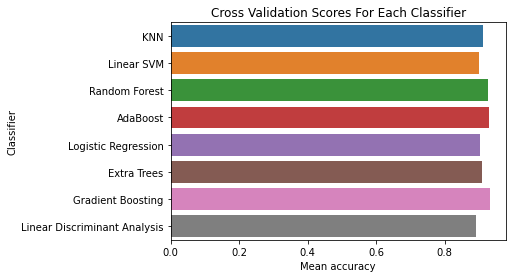

In [62]:
cv_scoring("accuracy")    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


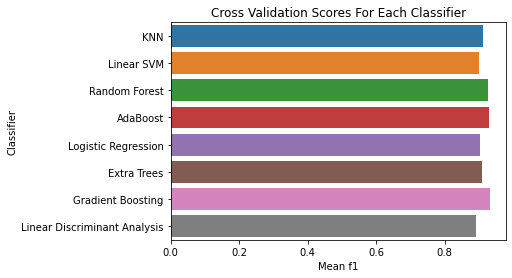

In [63]:
cv_scoring("f1")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


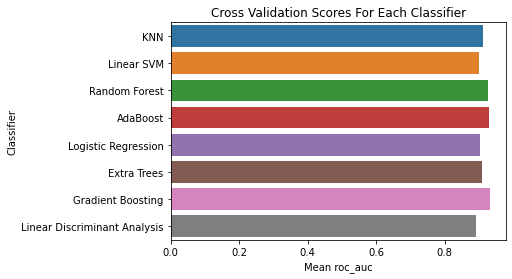

In [65]:
cv_scoring("roc_auc")

## Models Identified for Ensembling:
1. Gradient Boosting Classifier
2. AdaBoost
3. Random Forest

## Randomized Searching for Best Hyperparameters
- Grid Searching is brute force - too computationally intensive

In [79]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Gradient Boosting Classifier

In [83]:
from sklearn.model_selection import RandomizedSearchCV
GB_check = GradientBoostingClassifier(random_state=42)
gb_param_dist = {"n_estimators": [100, 200, 500, 800, 1000],
                "learning_rate": [0.001, 0.1, 0.05, 0.1, 1, 10],
                "max_depth": [x for x in range(10)],
                "max_features": [0.1, 0.5, 1]}

RS_GB = RandomizedSearchCV(GB_check, param_distributions = gb_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_GB.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.1, 0.05, 0.1,
                                                          1, 10],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [0.1, 0.5, 1],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000]},
                   scoring='accuracy', verbose=1)

In [102]:
RS_GB_best = RS_GB.best_estimator_
RS_GB_best

GradientBoostingClassifier(learning_rate=0.001, max_depth=7, max_features=1,
                           n_estimators=500, random_state=42)

### AdaBoost

In [82]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [84]:
ada_check = AdaBoostClassifier(random_state=42)
ada_param_dist = {"algorithm": ["SAMME", "SAMME.R"],
                 "n_estimators": [1, 2, 3, 4, 5],
                 "learning_rate": [0.001, 0.1, 0.05, 0.1, 1, 10]}

RS_ada = RandomizedSearchCV(ada_check, param_distributions = ada_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_ada.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001, 0.1, 0.05, 0.1,
                                                          1, 10],
                                        'n_estimators': [1, 2, 3, 4, 5]},
                   scoring='accuracy', verbose=1)

In [103]:
RS_ada_best = RS_ada.best_estimator_
RS_ada_best

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.05, n_estimators=4,
                   random_state=42)

### Random Forest

In [86]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [96]:
rf_check = RandomForestClassifier(random_state=42)
rf_param_dist = {"max_depth": [x for x in range(4)],
                  "max_features": [x for x in range(7)],
                  "min_samples_split": [2, 3, 5 , 10],
                  "min_samples_leaf": [x for x in range(10)],
                  "n_estimators": [1, 2, 3, 10, 50]}
                 
RS_rf = RandomizedSearchCV(rf_check, param_distributions = rf_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_rf.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-p

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3],
                                        'max_features': [0, 1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [1, 2, 3, 10, 50]},
                   scoring='accuracy', verbose=1)

In [104]:
RS_rf_best = RS_rf.best_estimator_
RS_rf_best

RandomForestClassifier(max_depth=3, max_features=3, min_samples_split=10,
                       n_estimators=50, random_state=42)

## Feature Importance

In [105]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier


In [118]:
feature_col = X_train.columns.values

features_df = pd.DataFrame({"Features": feature_col,
                            "Gradient Boost Feature Importance": RS_GB_best.feature_importances_,
                             "AdaBoost Feature Importance": RS_ada_best.feature_importances_, 
                            "Random Forest Feature Importance": RS_rf_best.feature_importances_})

In [126]:
features_df.set_index("Features", inplace=True)
features_df

,Gradient Boost Feature Importance,AdaBoost Feature Importance,Random Forest Feature Importance
Features,,,
funding_rounds,0.091474,0.0,9.243848e-02
funding_total_usd,0.614595,1.0,6.351122e-01
is_software,0.001113,0.0,9.470410e-07
is_web,0.002513,0.0,7.884126e-04
is_mobile,0.000955,0.0,2.620504e-04
is_enterprise,0.004624,0.0,1.170905e-03
is_othercategory,0.004503,0.0,1.316510e-03
months_to_last_funding,0.111816,0.0,1.502664e-01
year_founded,0.101220,0.0,8.318333e-02


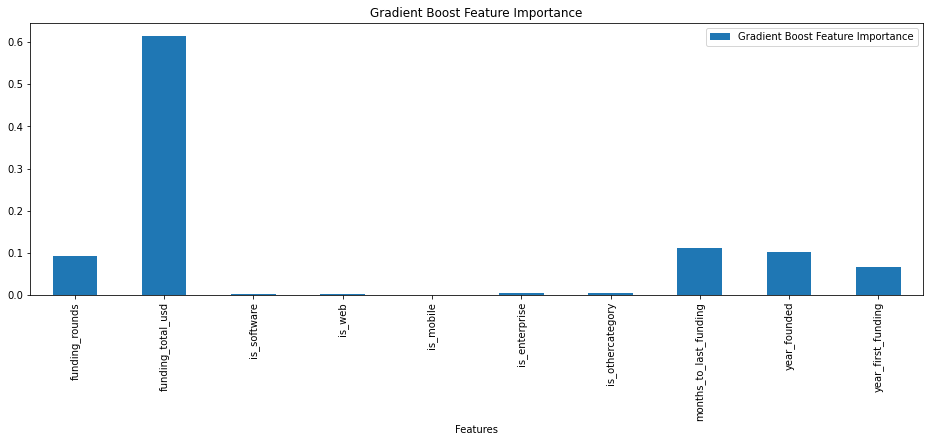

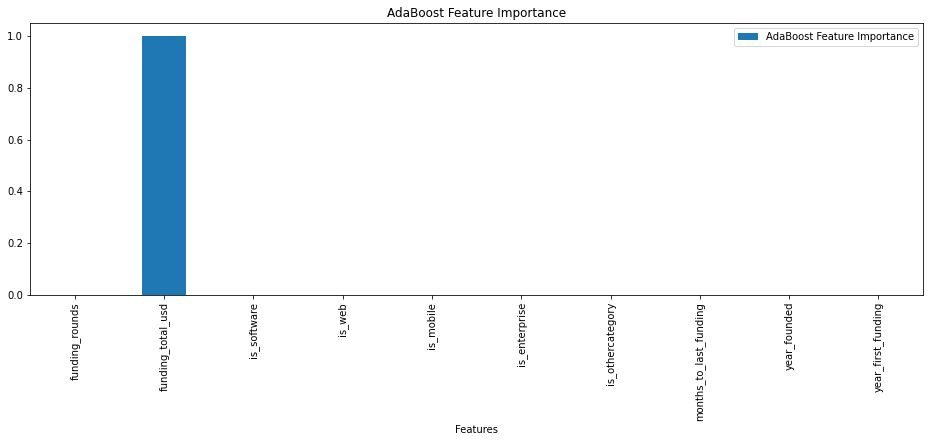

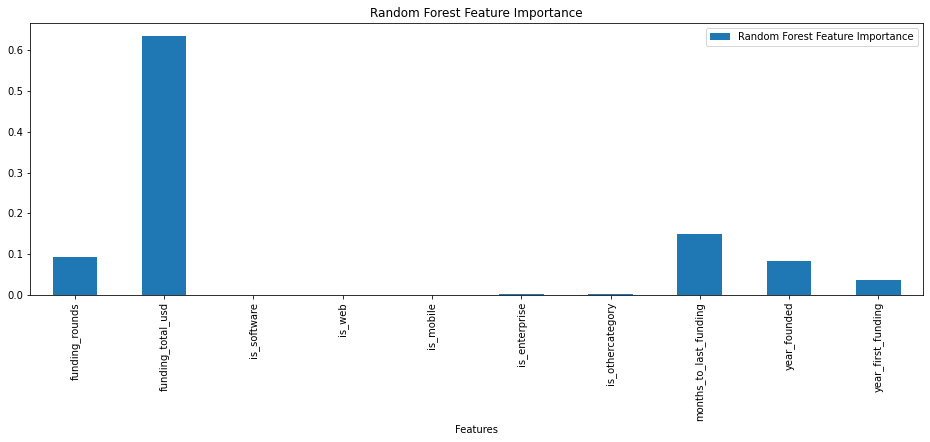

In [133]:
for x in features_df.columns:
    if x == "Features":
        continue
    else:
        
        features_df[[x]].plot(figsize = (16,5), kind = "bar").set_title(x)
        plt.show()

## Testing Individual Model Scores (F1)

In [152]:
for x, y in zip([RS_GB_best, RS_ada_best, RS_rf_best], ["Gradient Boost",
                                                       "ADABoost",
                                                       "Random Forest"]):
    pred = x.predict(X_test)
    print(y + " has F1 score = " + str(f1_score(y_test, pred, average = "macro")))

Gradient Boost has F1 score = 0.9406675074469919
ADABoost has F1 score = 0.9401117648143709
Random Forest has F1 score = 0.9401117648143709


## Ensembling

### Voting Classifier

In [136]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [("gb", RS_GB_best),
                                      ("ada", RS_ada_best),
                                      ("rf", RS_rf_best)])

voting = voting.fit(X_train, y_train.values.ravel())

In [149]:
voting_pred = voting.predict(X_test)
voting_pred

array(['Success', 'Failure', 'Success', ..., 'Failure', 'Failure',
       'Failure'], dtype=object)

In [150]:
f1_score(y_test, voting_pred, average = "macro")

0.9401117648143709

### Stacking Classifier

In [159]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators = [("gb", RS_GB_best),
                                      ("ada", RS_ada_best),
                                      ("rf", RS_rf_best)])

stacking = stacking.fit(X_train, y_train.values.ravel())

In [160]:
stacking_pred = stacking.predict(X_test)
stacking_pred

array(['Success', 'Failure', 'Success', ..., 'Failure', 'Failure',
       'Failure'], dtype=object)

In [162]:
stacking.score(X_test, y_test)

0.9401330376940134